In [1]:
# https://www.kaggle.com/mjbahmani/top-3-nlp-libraries-tutorial-nltk-spacy-gensim

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import warnings
import sklearn
import gensim
import scipy
import numpy
import json
import nltk
import sys
import csv
import os

In [4]:
print('matplotlib: {}'.format(matplotlib.__version__))
print('scipy: {}'.format(scipy.__version__))
print('seaborn: {}'.format(sns.__version__))
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))
print('Python: {}'.format(sys.version))

matplotlib: 3.0.3
scipy: 1.2.1
seaborn: 0.9.0
pandas: 0.24.2
numpy: 1.16.2
Python: 3.7.2 (default, Feb 12 2019, 08:15:36) 
[Clang 10.0.0 (clang-1000.11.45.5)]


In [5]:
sns.set(style='white', context='notebook', palette='deep')
warnings.filterwarnings('ignore')
sns.set_style('white')
%matplotlib inline

In [7]:
print(os.listdir("../../data/raw/gendered_pronoun_resolution/"))

['test_stage_1.tsv', 'sample_submission_stage_1.csv']


In [8]:
gendered_pronoun_df = pd.read_csv('../../data/raw/gendered_pronoun_resolution/test_stage_1.tsv', delimiter='\t')

In [9]:
submission = pd.read_csv('../../data/raw/gendered_pronoun_resolution/sample_submission_stage_1.csv')

In [10]:
gendered_pronoun_df.shape

(2000, 9)

In [11]:
submission.shape

(2000, 4)

In [12]:
gendered_pronoun_df.head()

,ID,Text,Pronoun,Pronoun-offset,A,A-offset,B,B-offset,URL
0,development-1,Zoe Telford -- played the police officer girlf...,her,274,Cheryl Cassidy,191,Pauline,207,http://en.wikipedia.org/wiki/List_of_Teachers_...
1,development-2,"He grew up in Evanston, Illinois the second ol...",His,284,MacKenzie,228,Bernard Leach,251,http://en.wikipedia.org/wiki/Warren_MacKenzie
2,development-3,"He had been reelected to Congress, but resigne...",his,265,Angeloz,173,De la Sota,246,http://en.wikipedia.org/wiki/Jos%C3%A9_Manuel_...
3,development-4,The current members of Crime have also perform...,his,321,Hell,174,Henry Rosenthal,336,http://en.wikipedia.org/wiki/Crime_(band)
4,development-5,Her Santa Fe Opera debut in 2005 was as Nuria ...,She,437,Kitty Oppenheimer,219,Rivera,294,http://en.wikipedia.org/wiki/Jessica_Rivera


In [13]:
gendered_pronoun_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
ID                2000 non-null object
Text              2000 non-null object
Pronoun           2000 non-null object
Pronoun-offset    2000 non-null int64
A                 2000 non-null object
A-offset          2000 non-null int64
B                 2000 non-null object
B-offset          2000 non-null int64
URL               2000 non-null object
dtypes: int64(3), object(6)
memory usage: 140.7+ KB


In [14]:
print(gendered_pronoun_df.Text.head())

0    Zoe Telford -- played the police officer girlf...
1    He grew up in Evanston, Illinois the second ol...
2    He had been reelected to Congress, but resigne...
3    The current members of Crime have also perform...
4    Her Santa Fe Opera debut in 2005 was as Nuria ...
Name: Text, dtype: object


In [15]:
print("Shape of train set : ",gendered_pronoun_df.shape)

Shape of train set :  (2000, 9)


In [16]:
gendered_pronoun_df.columns

Index(['ID', 'Text', 'Pronoun', 'Pronoun-offset', 'A', 'A-offset', 'B',
       'B-offset', 'URL'],
      dtype='object')

In [17]:
def check_missing_data(df):
    flag=df.isna().sum().any()
    if flag==True:
        total = df.isnull().sum()
        percent = (df.isnull().sum())/(df.isnull().count()*100)
        output = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
        data_type = []
        # written by MJ Bahmani
        for col in df.columns:
            dtype = str(df[col].dtype)
            data_type.append(dtype)
        output['Types'] = data_type
        return(np.transpose(output))
    else:
        return(False)

In [18]:
check_missing_data(gendered_pronoun_df)

False

In [19]:
gendered_pronoun_df["num_words"] = gendered_pronoun_df["Text"].apply(lambda x: len(str(x).split()))

In [20]:
#MJ Bahmani
print('maximum of num_words in data_df',gendered_pronoun_df["num_words"].max())
print('min of num_words in data_df',gendered_pronoun_df["num_words"].min())

maximum of num_words in data_df 204
min of num_words in data_df 16


In [21]:
gendered_pronoun_df["num_unique_words"] = gendered_pronoun_df["Text"].apply(lambda x: len(set(str(x).split())))
print('maximum of num_unique_words in train',gendered_pronoun_df["num_unique_words"].max())
print('mean of num_unique_words in data_df',gendered_pronoun_df["num_unique_words"].mean())

maximum of num_unique_words in train 136
mean of num_unique_words in data_df 56.4005


In [22]:
gendered_pronoun_df["num_chars"] = gendered_pronoun_df["Text"].apply(lambda x: len(str(x)))
print('maximum of num_chars in data_df',gendered_pronoun_df["num_chars"].max())

maximum of num_chars in data_df 1270


In [23]:
from nltk.corpus import stopwords
eng_stopwords = set(stopwords.words("english"))

In [24]:
gendered_pronoun_df["num_stopwords"] = gendered_pronoun_df["Text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

print('maximum of num_stopwords in data_df',gendered_pronoun_df["num_stopwords"].max())

maximum of num_stopwords in data_df 88


In [25]:
import string
gendered_pronoun_df["num_punctuations"] =gendered_pronoun_df['Text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )
print('maximum of num_punctuations in data_df',gendered_pronoun_df["num_punctuations"].max())

maximum of num_punctuations in data_df 93


In [27]:
gendered_pronoun_df["num_words_upper"] = gendered_pronoun_df["Text"].\
    apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
print('maximum of num_words_upper in data_df',gendered_pronoun_df["num_words_upper"].max())

maximum of num_words_upper in data_df 11


In [28]:
print(gendered_pronoun_df.columns)
gendered_pronoun_df.head(1)

Index(['ID', 'Text', 'Pronoun', 'Pronoun-offset', 'A', 'A-offset', 'B',
       'B-offset', 'URL', 'num_words', 'num_unique_words', 'num_chars',
       'num_stopwords', 'num_punctuations', 'num_words_upper'],
      dtype='object')


,ID,Text,Pronoun,Pronoun-offset,A,A-offset,B,B-offset,URL,num_words,num_unique_words,num_chars,num_stopwords,num_punctuations,num_words_upper
0,development-1,Zoe Telford -- played the police officer girlf...,her,274,Cheryl Cassidy,191,Pauline,207,http://en.wikipedia.org/wiki/List_of_Teachers_...,74,61,426,29,14,0


In [29]:
pronoun=gendered_pronoun_df["Pronoun"]

In [31]:
np.unique(pronoun)

array(['He', 'Her', 'His', 'She', 'he', 'her', 'him', 'his', 'she'],
      dtype=object)

In [32]:
## is suggested by  https://www.kaggle.com/aavella77
binary = {
    "He": 0,
    "he": 0,
    "She": 1,
    "she": 1,
    "His": 2,
    "his": 2,
    "Him": 3,
    "him": 3,
    "Her": 4,
    "her": 4
}
for index in range(len(gendered_pronoun_df)):
    key = gendered_pronoun_df.iloc[index]['Pronoun']
    gendered_pronoun_df.at[index, 'Pronoun_binary'] = binary[key]
gendered_pronoun_df.head(30)

,ID,Text,Pronoun,Pronoun-offset,A,A-offset,B,B-offset,URL,num_words,num_unique_words,num_chars,num_stopwords,num_punctuations,num_words_upper,Pronoun_binary
0,development-1,Zoe Telford -- played the police officer girlf...,her,274,Cheryl Cassidy,191,Pauline,207,http://en.wikipedia.org/wiki/List_of_Teachers_...,74,61,426,29,14,0,4.0
1,development-2,"He grew up in Evanston, Illinois the second ol...",His,284,MacKenzie,228,Bernard Leach,251,http://en.wikipedia.org/wiki/Warren_MacKenzie,65,58,410,22,12,0,2.0
2,development-3,"He had been reelected to Congress, but resigne...",his,265,Angeloz,173,De la Sota,246,http://en.wikipedia.org/wiki/Jos%C3%A9_Manuel_...,95,71,536,39,16,0,2.0
3,development-4,The current members of Crime have also perform...,his,321,Hell,174,Henry Rosenthal,336,http://en.wikipedia.org/wiki/Crime_(band),69,58,401,24,13,1,2.0
4,development-5,Her Santa Fe Opera debut in 2005 was as Nuria ...,She,437,Kitty Oppenheimer,219,Rivera,294,http://en.wikipedia.org/wiki/Jessica_Rivera,112,80,660,43,18,1,1.0
5,development-6,Sandra Collins is an American DJ. She got her ...,She,411,Collins,236,DJ,347,http://en.wikipedia.org/wiki/Sandra_Collins,81,64,488,31,13,4,1.0
6,development-7,Reb Chaim Yaakov's wife is the sister of Rabbi...,his,273,Reb Asher,152,Akiva Eiger,253,http://en.wikipedia.org/wiki/Asher_Arieli,72,48,432,27,11,0,2.0
7,development-8,Slant Magazine's Sal Cinquemani viewed the alb...,his,337,Greg Kot,173,Robert Christgau,377,http://en.wikipedia.org/wiki/The_Truth_About_L...,71,60,451,26,21,0,2.0
8,development-9,Her father was an Englishman ``of rank and cul...,her,246,Mary Paine,255,Kelsey,267,http://en.wikipedia.org/wiki/Mary_S._Peake,53,42,302,23,13,0,4.0
9,development-10,Shaftesbury's UK partners in the production of...,she,329,Christina Jennings,196,Kirstine Stewart,226,http://en.wikipedia.org/wiki/Murdoch_Mysteries,52,45,381,16,14,4,1.0


In [33]:
from wordcloud import WordCloud as wc
from nltk.corpus import stopwords
def generate_wordcloud(text): 
    wordcloud = wc(relative_scaling = 1.0,stopwords = eng_stopwords).generate(text)
    fig,ax = plt.subplots(1,1,figsize=(10,10))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis("off")
    ax.margins(x=0, y=0)
    plt.show()

In [34]:
from nltk.corpus import stopwords
eng_stopwords = set(stopwords.words("english"))

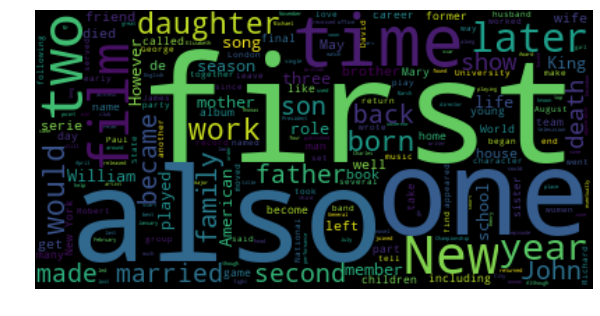

In [35]:
text =" ".join(gendered_pronoun_df.Text)
generate_wordcloud(text)

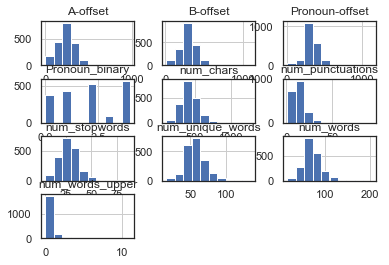

In [36]:
gendered_pronoun_df.hist();

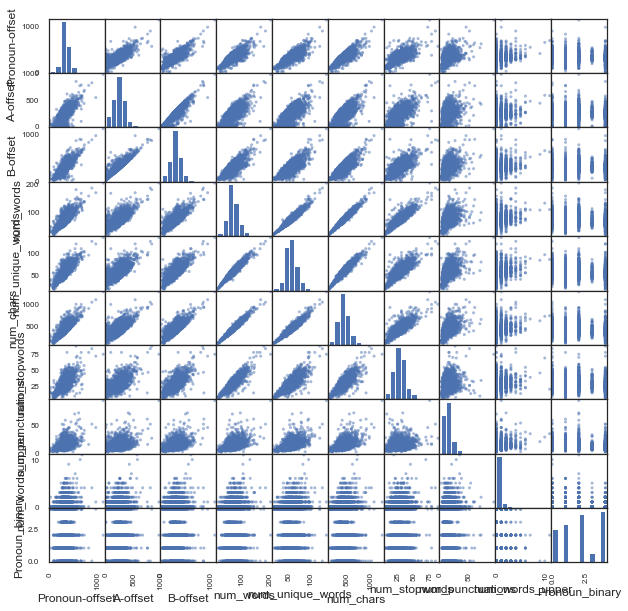

<Figure size 432x288 with 0 Axes>

In [37]:
pd.plotting.scatter_matrix(gendered_pronoun_df,figsize=(10,10))
plt.figure();

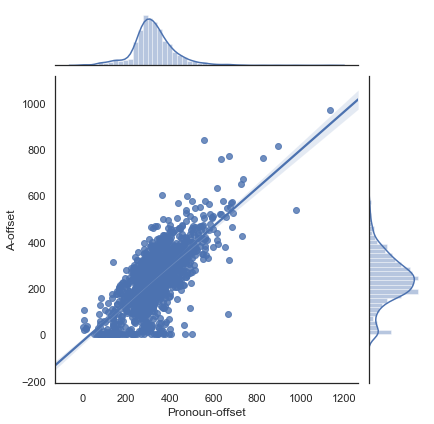

In [38]:
sns.jointplot(x='Pronoun-offset',y='A-offset' ,data=gendered_pronoun_df, kind='reg')

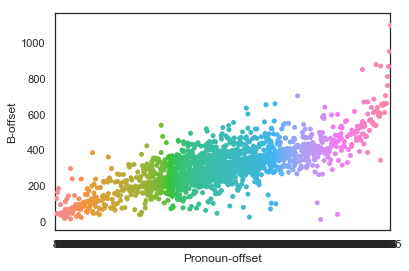

In [39]:
sns.swarmplot(x='Pronoun-offset',y='B-offset',data=gendered_pronoun_df);

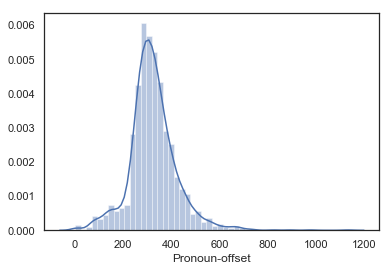

In [40]:
sns.distplot(gendered_pronoun_df["Pronoun-offset"])

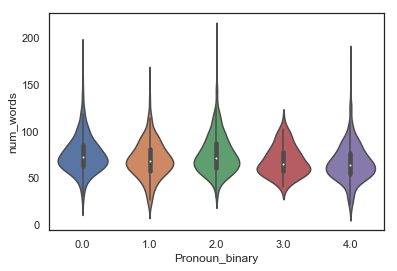

In [41]:
sns.violinplot(data=gendered_pronoun_df,x="Pronoun_binary", y="num_words")

In [42]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [43]:
gendered_pronoun_df.Text[0]

"Zoe Telford -- played the police officer girlfriend of Simon, Maggie. Dumped by Simon in the final episode of series 1, after he slept with Jenny, and is not seen again. Phoebe Thomas played Cheryl Cassidy, Pauline's friend and also a year 11 pupil in Simon's class. Dumped her boyfriend following Simon's advice after he wouldn't have sex with her but later realised this was due to him catching crabs off her friend Pauline."

In [44]:
our_text=gendered_pronoun_df.Text[0]

In [45]:
print(word_tokenize(our_text))

['Zoe', 'Telford', '--', 'played', 'the', 'police', 'officer', 'girlfriend', 'of', 'Simon', ',', 'Maggie', '.', 'Dumped', 'by', 'Simon', 'in', 'the', 'final', 'episode', 'of', 'series', '1', ',', 'after', 'he', 'slept', 'with', 'Jenny', ',', 'and', 'is', 'not', 'seen', 'again', '.', 'Phoebe', 'Thomas', 'played', 'Cheryl', 'Cassidy', ',', 'Pauline', "'s", 'friend', 'and', 'also', 'a', 'year', '11', 'pupil', 'in', 'Simon', "'s", 'class', '.', 'Dumped', 'her', 'boyfriend', 'following', 'Simon', "'s", 'advice', 'after', 'he', 'would', "n't", 'have', 'sex', 'with', 'her', 'but', 'later', 'realised', 'this', 'was', 'due', 'to', 'him', 'catching', 'crabs', 'off', 'her', 'friend', 'Pauline', '.']


In [46]:
from nltk.tokenize import sent_tokenize, word_tokenize
print(sent_tokenize(our_text))

['Zoe Telford -- played the police officer girlfriend of Simon, Maggie.', 'Dumped by Simon in the final episode of series 1, after he slept with Jenny, and is not seen again.', "Phoebe Thomas played Cheryl Cassidy, Pauline's friend and also a year 11 pupil in Simon's class.", "Dumped her boyfriend following Simon's advice after he wouldn't have sex with her but later realised this was due to him catching crabs off her friend Pauline."]


In [47]:
from nltk.tokenize import sent_tokenize, word_tokenize
 
phrases = sent_tokenize(our_text)
words = word_tokenize(our_text)
print(phrases)

['Zoe Telford -- played the police officer girlfriend of Simon, Maggie.', 'Dumped by Simon in the final episode of series 1, after he slept with Jenny, and is not seen again.', "Phoebe Thomas played Cheryl Cassidy, Pauline's friend and also a year 11 pupil in Simon's class.", "Dumped her boyfriend following Simon's advice after he wouldn't have sex with her but later realised this was due to him catching crabs off her friend Pauline."]


In [48]:
print(words)

['Zoe', 'Telford', '--', 'played', 'the', 'police', 'officer', 'girlfriend', 'of', 'Simon', ',', 'Maggie', '.', 'Dumped', 'by', 'Simon', 'in', 'the', 'final', 'episode', 'of', 'series', '1', ',', 'after', 'he', 'slept', 'with', 'Jenny', ',', 'and', 'is', 'not', 'seen', 'again', '.', 'Phoebe', 'Thomas', 'played', 'Cheryl', 'Cassidy', ',', 'Pauline', "'s", 'friend', 'and', 'also', 'a', 'year', '11', 'pupil', 'in', 'Simon', "'s", 'class', '.', 'Dumped', 'her', 'boyfriend', 'following', 'Simon', "'s", 'advice', 'after', 'he', 'would', "n't", 'have', 'sex', 'with', 'her', 'but', 'later', 'realised', 'this', 'was', 'due', 'to', 'him', 'catching', 'crabs', 'off', 'her', 'friend', 'Pauline', '.']


In [49]:
type(words)

list

In [50]:
stopWords = set(stopwords.words('english'))
words = word_tokenize(our_text)
wordsFiltered = []
 
for w in words:
    if w not in stopWords:
        wordsFiltered.append(w)
 
print(wordsFiltered)

['Zoe', 'Telford', '--', 'played', 'police', 'officer', 'girlfriend', 'Simon', ',', 'Maggie', '.', 'Dumped', 'Simon', 'final', 'episode', 'series', '1', ',', 'slept', 'Jenny', ',', 'seen', '.', 'Phoebe', 'Thomas', 'played', 'Cheryl', 'Cassidy', ',', 'Pauline', "'s", 'friend', 'also', 'year', '11', 'pupil', 'Simon', "'s", 'class', '.', 'Dumped', 'boyfriend', 'following', 'Simon', "'s", 'advice', 'would', "n't", 'sex', 'later', 'realised', 'due', 'catching', 'crabs', 'friend', 'Pauline', '.']


In [51]:
from nltk.corpus import stopwords

In [52]:
stopWords = set(stopwords.words('english'))

In [53]:
print(len(stopWords))
print(stopWords)

179
{'it', 'how', 'after', 'same', 'm', "shan't", 'been', 'once', 'mightn', 'this', 'did', 'to', 'when', "haven't", 'over', 'a', 'yourself', "hasn't", 'theirs', 'while', 'most', 'should', 're', 'each', 'other', 'him', 've', 'my', 'if', 'an', 'shan', 'not', 'here', 'some', 'our', 'as', 'what', 'who', 'she', 'out', 'any', "don't", 'himself', 'on', 'about', 'both', 'be', 'between', 'just', 'itself', 'through', 'its', 'nor', 'isn', "doesn't", 'or', "should've", 'why', 'no', 'am', 'that', 'very', "didn't", 'doesn', 'few', "shouldn't", 'wasn', "aren't", 'will', 'they', 'more', 'from', 'ourselves', "isn't", "you'd", 'was', 'hasn', "you've", 'can', 'those', 'are', "she's", 'into', 's', 'which', 'needn', 'them', 'than', 'you', 'at', 'with', 'do', 'only', 'myself', 'shouldn', 'and', 'these', 'there', 'own', 't', "you're", 'yourselves', 'is', 'because', 'couldn', "wouldn't", 'ours', 'i', 'hadn', 'before', 'then', "mightn't", 'does', 'herself', 'below', "needn't", 'further', 'have', 'of', 'such', 

In [54]:
for w in words:
    if w not in stopWords:
        wordsFiltered.append(w)

In [55]:
our_text=gendered_pronoun_df.Text[0]

In [56]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

In [57]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize


ps = PorterStemmer()
 
for word in word_tokenize(our_text):
    print(ps.stem(word))

zoe
telford
--
play
the
polic
offic
girlfriend
of
simon
,
maggi
.
dump
by
simon
in
the
final
episod
of
seri
1
,
after
he
slept
with
jenni
,
and
is
not
seen
again
.
phoeb
thoma
play
cheryl
cassidi
,
paulin
's
friend
and
also
a
year
11
pupil
in
simon
's
class
.
dump
her
boyfriend
follow
simon
's
advic
after
he
would
n't
have
sex
with
her
but
later
realis
thi
wa
due
to
him
catch
crab
off
her
friend
paulin
.


In [58]:
import nltk
from nltk.tokenize import PunktSentenceTokenizer
 

sentences = nltk.sent_tokenize(our_text)   
for sent in sentences:
    print(nltk.pos_tag(nltk.word_tokenize(sent)))

[('Zoe', 'NNP'), ('Telford', 'NNP'), ('--', ':'), ('played', 'VBD'), ('the', 'DT'), ('police', 'NN'), ('officer', 'NN'), ('girlfriend', 'NN'), ('of', 'IN'), ('Simon', 'NNP'), (',', ','), ('Maggie', 'NNP'), ('.', '.')]
[('Dumped', 'VBN'), ('by', 'IN'), ('Simon', 'NNP'), ('in', 'IN'), ('the', 'DT'), ('final', 'JJ'), ('episode', 'NN'), ('of', 'IN'), ('series', 'NN'), ('1', 'CD'), (',', ','), ('after', 'IN'), ('he', 'PRP'), ('slept', 'VBD'), ('with', 'IN'), ('Jenny', 'NNP'), (',', ','), ('and', 'CC'), ('is', 'VBZ'), ('not', 'RB'), ('seen', 'VBN'), ('again', 'RB'), ('.', '.')]
[('Phoebe', 'NNP'), ('Thomas', 'NNP'), ('played', 'VBD'), ('Cheryl', 'NNP'), ('Cassidy', 'NNP'), (',', ','), ('Pauline', 'NNP'), ("'s", 'POS'), ('friend', 'NN'), ('and', 'CC'), ('also', 'RB'), ('a', 'DT'), ('year', 'NN'), ('11', 'CD'), ('pupil', 'NN'), ('in', 'IN'), ('Simon', 'NNP'), ("'s", 'POS'), ('class', 'NN'), ('.', '.')]
[('Dumped', 'NNP'), ('her', 'PRP$'), ('boyfriend', 'NN'), ('following', 'VBG'), ('Simon', 'N

In [59]:
import nltk
from nltk.corpus import state_union
from nltk.tokenize import PunktSentenceTokenizer
 

sentences = nltk.sent_tokenize(our_text)   
 
data = []
for sent in sentences:
    data = data + nltk.pos_tag(nltk.word_tokenize(sent))
 
for word in data: 
    if 'NNP' in word[1]: 
        print(word)

('Zoe', 'NNP')
('Telford', 'NNP')
('Simon', 'NNP')
('Maggie', 'NNP')
('Simon', 'NNP')
('Jenny', 'NNP')
('Phoebe', 'NNP')
('Thomas', 'NNP')
('Cheryl', 'NNP')
('Cassidy', 'NNP')
('Pauline', 'NNP')
('Simon', 'NNP')
('Dumped', 'NNP')
('Simon', 'NNP')
('Pauline', 'NNP')


In [62]:
nltk.download('names')

[nltk_data] Downloading package names to
[nltk_data]     /Users/kirillvladimirov/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.


True

In [63]:
#https://pythonspot.com/natural-language-processing-prediction/
from nltk.corpus import names
 
# Load data and training 
names = ([(name, 'male') for name in names.words('male.txt')] \
         + [(name, 'female') for name in names.words('female.txt')])

In [64]:
def gender_features(word): 
    return {'last_letter': word[-1]}

In [65]:
#Based on https://pythonspot.com/category/nltk/
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import names
 
def gender_features(word): 
    return {'last_letter': word[-1]} 
 
# Load data and training 
names = ([(name, 'male') for name in names.words('male.txt')] + 
	 [(name, 'female') for name in names.words('female.txt')])
 
featuresets = [(gender_features(n), g) for (n,g) in names] 
train_set = featuresets
classifier = nltk.NaiveBayesClassifier.train(train_set) 
 
# Predict
print(classifier.classify(gender_features('Frank')))

male


In [66]:
# Predict, you can change name
name = 'Sarah'
print(classifier.classify(gender_features(name)))

female


In [67]:
positive_vocab = [ 'awesome', 'outstanding', 'fantastic', 'terrific', 'good', 'nice', 'great', ':)' ]
negative_vocab = [ 'bad', 'terrible','useless', 'hate', ':(' ]
neutral_vocab = [ 'movie','the','sound','was','is','actors','did','know','words','not' ]

In [68]:
def word_feats(words):
    return dict([(word, True) for word in words])
 
positive_features = [(word_feats(pos), 'pos') for pos in positive_vocab]
negative_features = [(word_feats(neg), 'neg') for neg in negative_vocab]
neutral_features = [(word_feats(neu), 'neu') for neu in neutral_vocab]

In [69]:
train_set = negative_features + positive_features + neutral_features

In [70]:
#Based on https://pythonspot.com/category/nltk/
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import names
 
def word_feats(words):
    return dict([(word, True) for word in words])
 
positive_vocab = [ 'awesome', 'outstanding', 'fantastic', 'terrific', 'good', 'nice', 'great', ':)' ]
negative_vocab = [ 'bad', 'terrible','useless', 'hate', ':(' ]
neutral_vocab = [ 'movie','the','sound','was','is','actors','did','know','words','not' ]
 
positive_features = [(word_feats(pos), 'pos') for pos in positive_vocab]
negative_features = [(word_feats(neg), 'neg') for neg in negative_vocab]
neutral_features = [(word_feats(neu), 'neu') for neu in neutral_vocab]
 
train_set = negative_features + positive_features + neutral_features
 
classifier = NaiveBayesClassifier.train(train_set) 
 
# Predict
neg = 0
pos = 0
##sentence = "Awesome movie, I liked it"
our_text = our_text.lower()
words = our_text.split(' ')
for word in words:
    classResult = classifier.classify( word_feats(word))
    if classResult == 'neg':
        neg = neg + 1
    if classResult == 'pos':
        pos = pos + 1
 
print('Positive: ' + str(float(pos)/len(words)))
print('Negative: ' + str(float(neg)/len(words)))

Positive: 0.527027027027027
Negative: 0.25675675675675674


In [74]:
import spacy

In [75]:
nlp = spacy.load('en')
doc = nlp(our_text)
i=0
for token in doc:
    i=i+1;
    if i<20:
        print('"' + token.text + '"')

OSError: [E050] Can't find model 'en'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

In [76]:
nlp = spacy.load('en')
doc=nlp(our_text)
i=0
for sent in doc.sents:
    i=i+1
    print(i,' - ',sent)

OSError: [E050] Can't find model 'en'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

In [77]:
doc = nlp( our_text)
print([(token.text, token.tag_) for token in doc])

NameError: name 'nlp' is not defined

In [78]:
doc = nlp(our_text)
for ent in doc.ents:
    print(ent.text, ent.label_)

NameError: name 'nlp' is not defined

In [ ]:
from spacy import displacy
 
doc = nlp(our_text )
displacy.render(doc, style='ent', jupyter=True)

In [ ]:
from spacy import displacy
 
doc = nlp(our_text)
displacy.render(doc, style='dep', jupyter=True, options={'distance': 90})

In [ ]:
import gensim
from gensim import corpora
from pprint import pprint
# How to create a dictionary from a list of sentences?
documents = [" Zoe Telford  played the police officer girlfriend of Simon, Maggie.",
             "Dumped by Simon in the final episode of series 1, after he slept with Jenny, and is not seen again.",
             "Phoebe Thomas played Cheryl Cassidy, Paulines friend and also a year 11 pupil in Simons class.", 
             "Dumped her boyfriend following Simons advice after he wouldnt ",
             "have sex with her but later realised this was due to him catching crabs off her friend Pauline."]

documents_2 = ["One source says the report will likely conclude that", 
                "the operation was carried out without clearance and", 
                "transparency and that those involved will be held", 
                "responsible. One of the sources acknowledged that the", 
                "report is still being prepared and cautioned that", 
                "things could change."]

In [ ]:
texts = [[text for text in doc.split()] for doc in documents]

# Create dictionary
dictionary = corpora.Dictionary(texts)

# Get information about the dictionary
print(dictionary)

In [ ]:
# 
print(dictionary.token2id)